In [ ]:
import pandas as pd

df = pd.read_csv("proceset.csv")
print(df.head())


   CaseID                       Activity          InitialStatus  \
0       1       Access to the DAP portal                  Start   
1       1      Selection of the position               Accessed   
2       1  Start preparing the documents      Position Selected   
3       1             Submit Application     Documents Prepared   
4       1     Receiving the applications  Application Submitted   

             FinalStatus                       ProcessFlow       Timestamp  
0               Accessed                  Start of process  3/30/2025 8:00  
1      Position Selected      Applicant selects a position  3/30/2025 8:05  
2     Documents Prepared       Documents preparation phase  3/30/2025 8:30  
3  Application Submitted         Submission of application  3/30/2025 9:00  
4   Application Received  Institution receives application  3/30/2025 9:30  


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print(df.head())

   CaseID                       Activity          InitialStatus  \
0       1       Access to the DAP portal                  Start   
1       1      Selection of the position               Accessed   
2       1  Start preparing the documents      Position Selected   
3       1             Submit Application     Documents Prepared   
4       1     Receiving the applications  Application Submitted   

             FinalStatus                       ProcessFlow           Timestamp  
0               Accessed                  Start of process 2025-03-30 08:00:00  
1      Position Selected      Applicant selects a position 2025-03-30 08:05:00  
2     Documents Prepared       Documents preparation phase 2025-03-30 08:30:00  
3  Application Submitted         Submission of application 2025-03-30 09:00:00  
4   Application Received  Institution receives application 2025-03-30 09:30:00  


In [ ]:
!pip install pm4py


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.7 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=f17714527d4c097efeb3e47029a6a231526236bb0f6c82829bde3852faf9410b
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [ ]:
df = df.rename(columns={
    'CaseID': 'case:concept:name',
    'Activity': 'concept:name',
    'Timestamp': 'time:timestamp',
    'InitialStatus': 'initial_status',
    'FinalStatus': 'final_status',
    'ProcessFlow': 'process_flow'
})
print(df.columns)


Index(['case:concept:name', 'concept:name', 'initial_status', 'final_status',
       'process_flow', 'time:timestamp'],
      dtype='object')


In [ ]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
df = dataframe_utils.convert_timestamp_columns_in_df(df)
log = log_converter.apply(df)
print(log[0])


{'attributes': {'concept:name': 1}, 'events': [{'concept:name': 'Access to the DAP portal', 'initial_status': 'Start', 'final_status': 'Accessed', 'process_flow': 'Start of process', 'time:timestamp': Timestamp('2025-03-30 08:00:00')}, '..', {'concept:name': 'Selection of the winners', 'initial_status': 'Interview Completed', 'final_status': 'Winners Selected', 'process_flow': 'Final selection phase', 'time:timestamp': Timestamp('2025-04-02 16:00:00')}]}


In [ ]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)


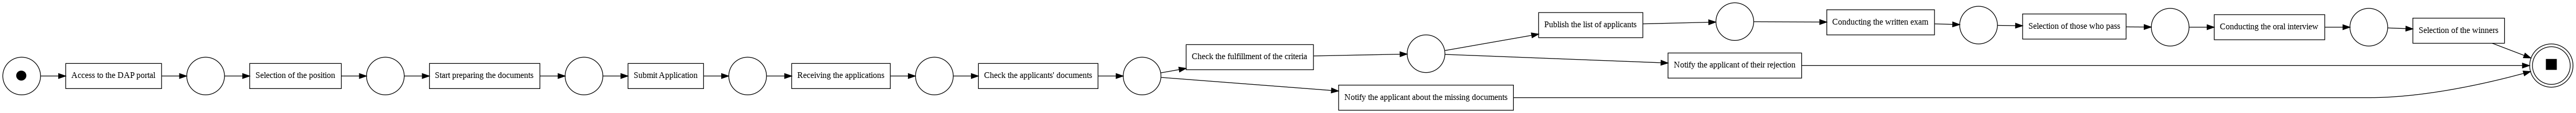

In [ ]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)
